# 📌 Student Satisfaction Survey Analysis

### Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Ignore warnings for clarity

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load Dataset

In [24]:
file_path = "Student_Satisfaction_Survey.csv"  # Update path if needed
df = pd.read_csv(file_path, encoding="latin1")

In [25]:
df

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE


### Step 3: Quick Overview

In [10]:

print(df.shape)
print(df.info())
print(df.head())



(580, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SN                    580 non-null    int64 
 1   Total Feedback Given  580 non-null    int64 
 2   Total Configured      580 non-null    int64 
 3   Questions             580 non-null    object
 4   Weightage 1           580 non-null    int64 
 5   Weightage 2           580 non-null    int64 
 6   Weightage 3           580 non-null    int64 
 7   Weightage 4           580 non-null    int64 
 8   Weightage 5           580 non-null    int64 
 9   Average/ Percentage   580 non-null    object
 10  Course Name           580 non-null    object
 11  Basic Course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB
None
   SN  Total Feedback Given  Total Configured  \
0   1                     1                12   
1   2                     1    

# 🧹 Data Cleaning

### Split "Average/ Percentage" column into two new numeric columns

In [30]:
df[['Average', 'Percentage']] = df['Average/ Percentage'].str.split("/", expand=True)
df['Average'] = df['Average'].astype(str).str.strip().astype(float)
df['Percentage'] = df['Percentage'].astype(str).str.strip().astype(float)

### Drop old column

In [31]:
df.drop(columns=['Average/ Percentage'], inplace=True)

### Clean course names (remove FY, SY, TY prefixes if needed)

In [ ]:
df['Course Name'] = df['Course Name'].str.replace(r'^[FSYT]+\s*', '', regex=True).str.strip()

### Check missing values

In [33]:
print(df.isnull().sum())

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Course Name             0
Basic Course            0
Average                 0
Percentage              0
dtype: int64


# 📊 Insights & EDA

### . Pie Chart of average satisfaction by course

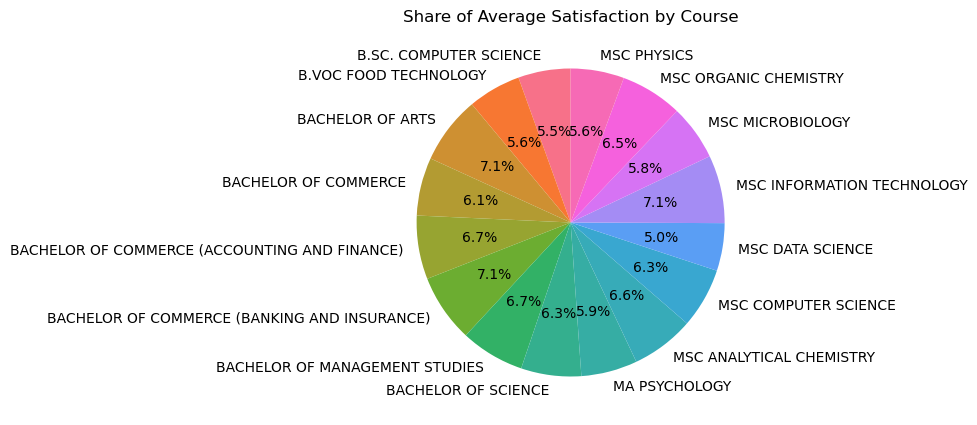

In [35]:
course_avg = df.groupby('Basic Course')['Average'].mean()
plt.figure(figsize=(5,5))
plt.pie(course_avg.values, labels=course_avg.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(course_avg)))
plt.title("Share of Average Satisfaction by Course")
plt.show()

###  1. Average satisfaction by Question


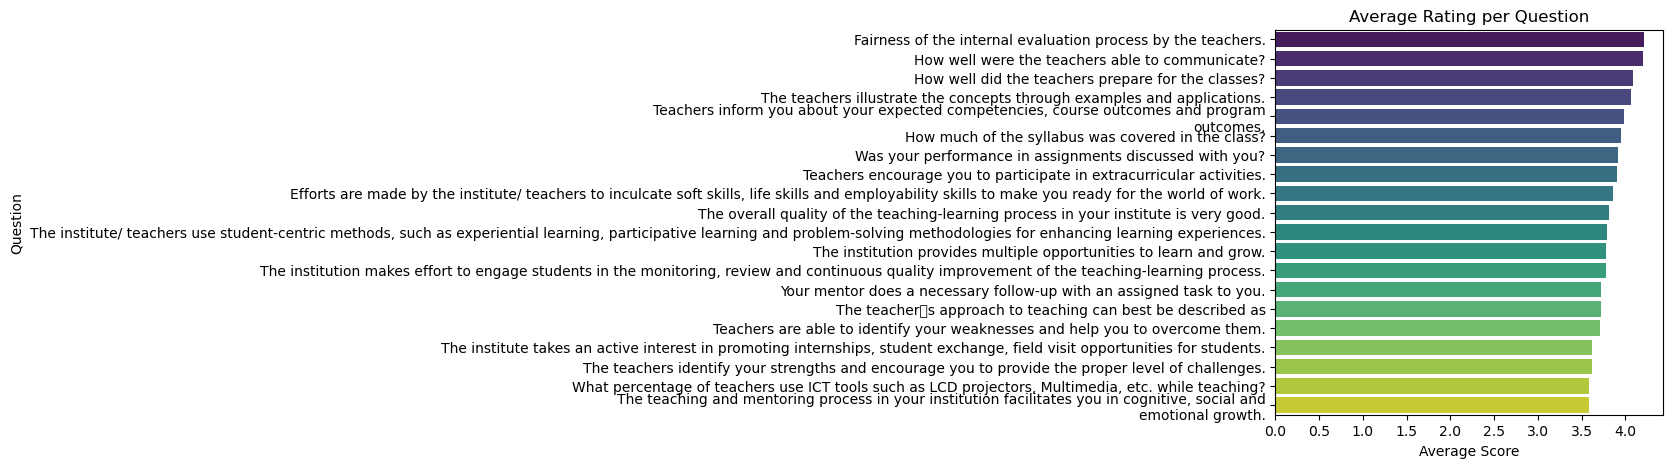

In [41]:
question_avg = df.groupby('Questions')['Average'].mean().sort_values(ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(y=question_avg.index, x=question_avg.values, palette="viridis")
plt.title("Average Rating per Question")
plt.xlabel("Average Score")
plt.ylabel("Question")
plt.show()



### 2. Distribution of ratings (Weightages)

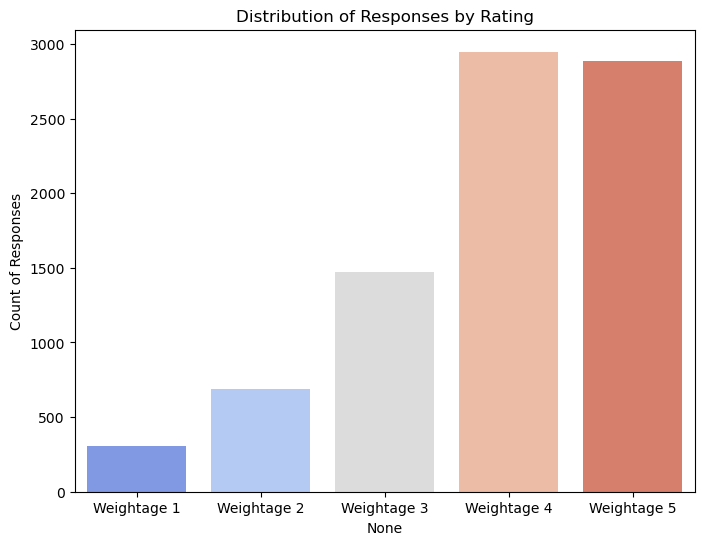

In [18]:
weights = df[['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5']].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=weights.index, y=weights.values, palette="coolwarm")
plt.title("Distribution of Responses by Rating")
plt.ylabel("Count of Responses")
plt.show()



 ### 3. Average satisfaction by Course

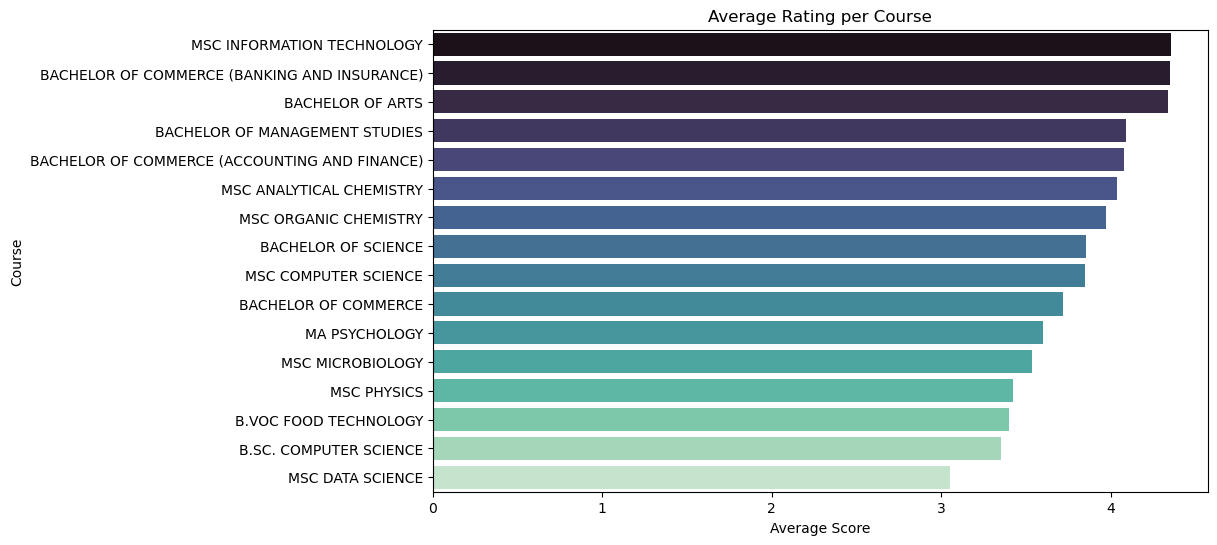

In [19]:
course_avg = df.groupby('Basic Course')['Average'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=course_avg.index, x=course_avg.values, palette="mako")
plt.title("Average Rating per Course")
plt.xlabel("Average Score")
plt.ylabel("Course")
plt.show()



### 4. Correlation Heatmap of weightages

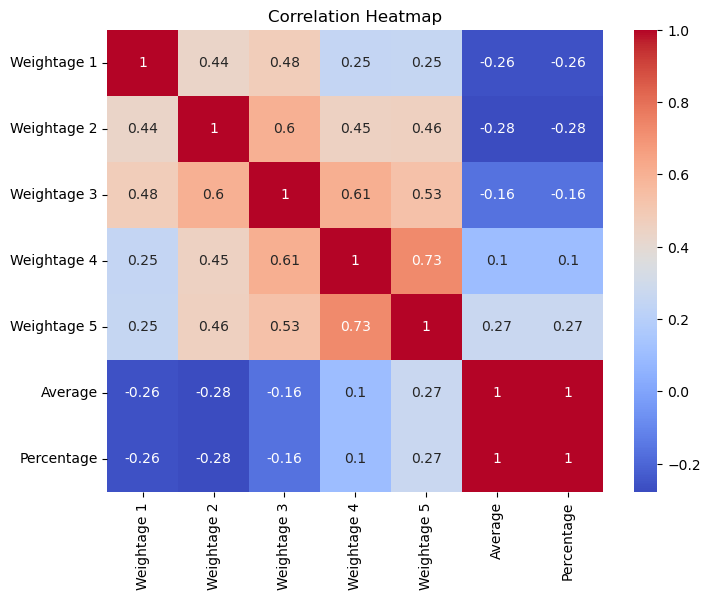

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5','Average','Percentage']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



# 🤖 Simple Machine Learning

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use Average & Percentage for clustering
X = df[['Average','Percentage']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering into 3 groups (Low, Medium, High satisfaction)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


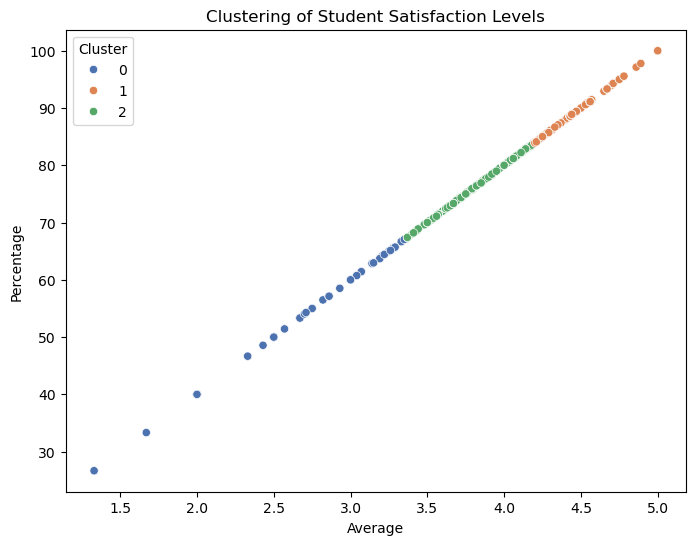

In [22]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Average", y="Percentage", hue="Cluster", palette="deep")
plt.title("Clustering of Student Satisfaction Levels")
plt.show()



# ✅ Key Insights

In [23]:
print("🔹 Highest Rated Question:", question_avg.index[0], "->", question_avg.values[0])
print("🔹 Lowest Rated Question:", question_avg.index[-1], "->", question_avg.values[-1])
print("🔹 Best Performing Course:", course_avg.index[0], "->", course_avg.values[0])
print("🔹 Worst Performing Course:", course_avg.index[-1], "->", course_avg.values[-1])


🔹 Highest Rated Question: Fairness of the internal evaluation process by the teachers. -> 4.2155172413793105
🔹 Lowest Rated Question: The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth. -> 3.577931034482759
🔹 Best Performing Course: MSC INFORMATION TECHNOLOGY -> 4.3545
🔹 Worst Performing Course: MSC DATA SCIENCE -> 3.0505
